In [39]:
import pandas as pd
import os
import json
import sys
from os.path import expanduser
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from pysd2cat.data import pipeline
from pysd2cat.analysis import correctness 

from data_converge.util import data_utils as du

from agavepy.agave import Agave, AgaveError
ag = Agave.restore()

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


DATA_CONVERGE_PROJECT="sd2e-project-43"

data_converge_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_PROJECT)
experiment_dir = os.path.realpath(os.path.join(data_converge_base, 'test'))
experiment_dir_contents = [os.path.realpath(os.path.join(experiment_dir, x)) for x in os.listdir(experiment_dir)]

experiments = [x for x in  experiment_dir_contents 
               if os.path.isdir(x) and "dc_" in x]

DATA_CONVERGE_CORRECTNESS_DATA_PROJECT="sd2e-project-45"
DATA_CONVERGE_CORRECTNESS_DATA_PROJECT_ID="data-sd2e-projects.sd2e-project-45"
data_converge_correctness_data_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_CORRECTNESS_DATA_PROJECT)

correctness_dir = os.path.join(data_converge_correctness_data_base, 'correctness')
correctness_dir_contents = [os.path.realpath(os.path.join(correctness_dir, x)) for x in os.listdir(correctness_dir)]



experiments.sort()
experiments



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_CEN-PK-Inducible-CRISPR-4-Day-Obstacle-Course_20200506021137',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_CEN-PK-Inducible-CRISPR-Characterization_20200426200027',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200414091814',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Growth-Curves_20200327174254',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Growth-Curves_20200414150010',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Growth-Curves_20200423201016',
 '/work/projec

In [2]:
experiment_id  = "r1dag7xpmgar9k_r1dakfqtk7hpzb"
XPLAN_PROJECT="sd2e-project-14"
xplan_base = os.path.join(expanduser("~"), 'sd2e-projects', XPLAN_PROJECT)
data_file = os.path.join(xplan_base, 'xplan-reactor', 'data', 'transcriptic', experiment_id + '.csv' )


experiment_flow = pd.read_csv(data_file, index_col=0)
#experiment_flow

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
controls = experiment_flow.loc[(experiment_flow.strain_name == "WT-Live-Control") | (experiment_flow.strain_name == "WT-Dead-Control")]
channels = ['FSC-A', 'SSC-A', 'BL1-A', 'FSC-W', 'FSC-H', 'SSC-W', 'SSC-H']
channels_under = [ x.replace('-', '_') for x in channels]
renaming = dict(zip(channels_under, channels))
controls = controls.rename(columns=renaming)



In [46]:
def do_analysis_wrapper(experiment_path):
    experiment_name = experiment_path.split("/")[-1]
    print(experiment_name)
    #print(experiment_path)
    df = du.get_data_and_metadata(experiment_path)

    return df


experiment_path = '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648'
#experiments[4]

experiment_df = do_analysis_wrapper(experiment_path)

dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b10527ecdd8>,
      dtype=object)

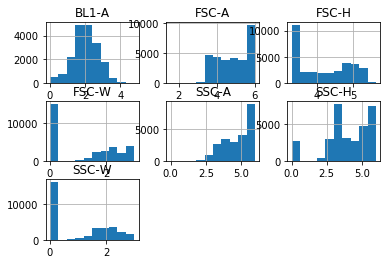

In [41]:

#controls[channels].hist()
controls[channels].apply(np.log10).replace([np.inf, -np.inf], 0.0).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b0ffc900b38>,
      dtype=object)

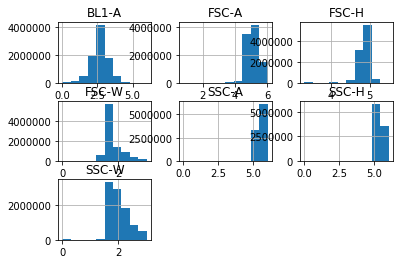

In [47]:
#experiment_df[channels].hist()
experiment_df[channels].apply(np.log10).replace([np.inf, -np.inf], 0.0).hist()

In [48]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
c_d = controls[channels].apply(np.log10).replace([np.inf, -np.inf], 0.0).describe()
e_d = experiment_df[channels].apply(np.log10).replace([np.inf, -np.inf], 0.0).describe()
e_d - c_d

,FSC-A,SSC-A,BL1-A,FSC-W,FSC-H,SSC-W,SSC-H
count,9398118.000,9387476.000,8990220.000,9397279.000,9397279.000,9397279.000,9397279.000
mean,0.198,0.761,0.650,0.607,0.689,0.999,1.436
std,-0.475,-0.754,-0.124,-0.829,-0.534,-0.710,-1.350
min,-0.802,0.000,0.000,0.000,-0.000,0.000,0.000
25%,0.805,1.417,0.770,1.580,1.381,1.724,2.148
50%,0.107,0.499,0.682,0.283,0.798,1.934,1.415
75%,-0.479,-0.034,0.516,-0.335,0.085,0.185,0.158
max,0.000,0.000,1.223,0.000,-0.133,0.000,0.000


In [49]:
from scipy.stats import wasserstein_distance as wd
from scipy.special import kl_div as kl

c_d = controls[channels].apply(np.log10).replace([np.inf, -np.inf], 0.0)
e_d = experiment_df[channels].apply(np.log10).replace([np.inf, -np.inf], 0.0)

diff = pd.Series()
for channel in channels:
    diff[channel] = wd(c_d[channel], e_d[channel])
    #diff[channel] = kl(c_d[channel], e_d[channel])
diff


FSC-A   nan  
SSC-A   nan  
BL1-A   nan  
FSC-W   0.909
FSC-H   0.743
SSC-W   0.999
SSC-H   1.492
dtype: float64

In [50]:
controls[['live', 'strain_name']].drop_duplicates()
#controls.columns

,live,strain_name
2435943,0,WT-Live-Control
2435944,1,WT-Live-Control
2437547,0,WT-Dead-Control
2438610,1,WT-Dead-Control


In [51]:
def do_analysis(experiment, controls):

    ## load dataset from data converge
    df = du.get_data_and_metadata(experiment)
    
    if df is None:
        print("Failed to get Data and Metadata")
        return None, None
    
    print(df.strain_name.unique())


    
    ## Setup parameters
    out_dir = '.'
    
    high_control = "WT-Live-Control"
    low_control = "WT-Dead-Control"
    
    controls['class_label'] = controls.apply(lambda x: 1 if x.strain_name == high_control else 0, axis=1)
    df.loc[:, 'output'] = 1 #assume alive
    
    strain_col = 'strain_name'  
    
    ## TODO get channels automatically from dataset
    channels = ['FSC-A', 'SSC-A', 'BL1-A', 'FSC-W', 'FSC-H', 'SSC-W', 'SSC-H']

    ## res will be a per-sample calculation of its correctness (and related stats)
    res = correctness.compute_correctness_classifier(df,
                                                training_df=controls,
                                                out_dir = out_dir,
                                                mean_output_label='mean_correct_classifier',
                                                std_output_label='std_correct_classifier',
                                                mean_correct_high_name='mean_correct_high_classifier',
                                                std_correct_high_name='std_correct_high_classifier',
                                                mean_correct_low_name='mean_correct_low_classifier',
                                                std_correct_low_name='std_correct_low_classifier',
                                                description = str(experiment)+"_live_dead",
                                                high_control=high_control,
                                                low_control=low_control,
                                                strain_col=strain_col,
                                                add_predictions=True,
                                                id_col="sample_id",
                                                use_harness=True,
                                                channels=channels)
    
    ## save to current directory
    #res.to_csv(experiment.split("/")[-1] + ".csv")
    return (res, df)

def do_analysis_wrapper(experiment_path, controls):
    experiment_name = experiment_path.split("/")[-1]
    print(experiment_name)
    (res, df) = do_analysis(experiment_path, controls)
    return res, df
    



In [53]:
res, df = do_analysis_wrapper(experiment_path, controls)

dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648


MemoryError: 

In [ ]:
pd.set_option('display.max_rows', None)
mean_live = df.groupby(['strain_name', 'timepoint', 'inducer_concentration'])['predicted_output'].agg(np.mean).reset_index()
mean_live

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(mean_live, col="timepoint", hue='strain_name', height=4, margin_titles=True)
g.map(sns.lineplot, 'inducer_concentration', 'predicted_output')
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # remove the original texts
                                                # important to add this before setting titles
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')       


#sns.scatterplot(mean_live.timepoint, mean_live.inducer_concentration, size=mean_live.predicted_output, hue=mean_live.strain_name)
#plt.legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')       



In [ ]:
mean_live.groupby(['strain_name', 'timepoint'])['predicted_output'].agg(np.mean)

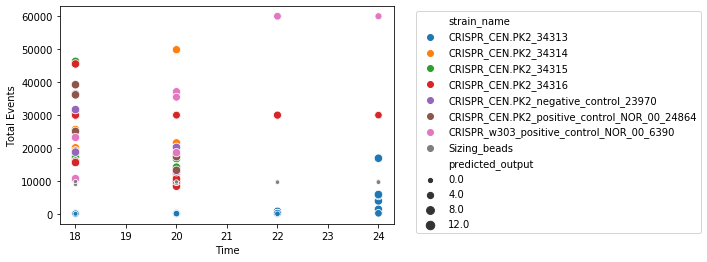

In [37]:
replicate_num_events = df.groupby(['strain_name', 'timepoint', 'inducer_concentration', 'replicate'])['FSC-A'].agg(len) #.reset_index()
#mean_events_strain = replicate_num_events.groupby(['strain_name', 'timepoint','inducer_concentration'])['FSC-A'].agg(np.mean)
#mean_events_strain
mean_live = df.groupby(['strain_name', 'timepoint', 'inducer_concentration', 'replicate'])['predicted_output'].agg(np.mean)
live_num = pd.DataFrame([mean_live, replicate_num_events]).transpose().reset_index()
sns.scatterplot( live_num.timepoint, live_num['FSC-A'],  hue=live_num.strain_name, size=10*live_num.predicted_output)
plt.xlabel("Time")
plt.ylabel("Total Events")
plt.legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')
#live_num